<a href="https://colab.research.google.com/github/userkkw/panda_challenge/blob/master/data_loader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

In [5]:
labels_frame = pd.read_csv('/content/drive/My Drive/patch_labels.csv')
labels_frame.shape

(31, 3)

In [0]:
class RedboudDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.labels_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir #photo dir
        self.transform = transform

    def __len__(self):
        return len(self.labels_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.labels_frame.iloc[idx, 1]) # for my dataset it is 1
        image = io.imread(img_name)
        label = self.labels_frame.iloc[idx, 2]
        sample = {'image': image, 'labels': label}

        if self.transform:
            sample = self.transform(sample)

        return sample

In [0]:
def show_landmarks(image):
    """Show image with landmarks"""
    plt.imshow(image)

number, image size, grade
0 (512, 512, 3) 2
number, image size, grade
1 (512, 512, 3) 2
number, image size, grade
2 (512, 512, 3) 1
number, image size, grade
3 (512, 512, 3) 1


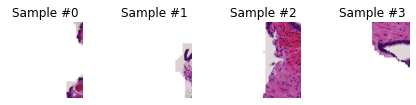

In [44]:
Redboud = RedboudDataset(csv_file='/content/drive/My Drive/patch_labels.csv',
                                    root_dir='/content/drive/My Drive/a51ad4ec379a9209c740025a6d410708')

fig = plt.figure()

for i in range(len(Redboud)):
    sample = face_dataset[i]
    print('number, image size, grade')
    print(i, sample['image'].shape, sample['labels'])

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    plt.imshow(sample['image'])

    if i == 3:
        plt.show()
        break

In [0]:
#dataloader with suffle and batch will be implemented
#dataloader = DataLoader(transformed_dataset, batch_size=4,shuffle=True, num_workers=4)